# Convolutional NN su database FASHION MNIST

Convolutional neural network sviluppata in TensorFlow 1.x, su database FASHION MNIST.

In questo notebook lo scopo è testare il modello con un altro database; per spiegazioni più dettagliate, guardare la versione corrispondente al modello su database MNIST.


In [0]:
%tensorflow_version 1.x

In [2]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [3]:
from tensorflow import keras as ks
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
#Per data visualization
import seaborn as sns

import time

print("Done")

Done


##Definizione metodi

In [4]:
class TimeHistory(ks.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

print("Done")

Done


#Import dataset
Import del dataset, e stampa della sua struttura.

In [5]:
#Import del database MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Struttura dati nel database
print("Numero elementi e dimensione immagini in train set: " + str(train_images.shape))
print("Numero elementi e dimensione immagini in test set: " + str(test_images.shape))
print("Numero elementi label in train set: " + str(len(train_labels)))
print("Numero elementi label in test set: " + str(len(test_labels)))
print("Tipo di struttura del train set: " + str(type(train_images)) + ", composto da " + str(type(train_images[0])))
print("Tipo di struttura del label set: " + str(type(train_labels)) + ", composto da " + str(type(train_labels[0])))
print("Le etichette sono interi; valore più piccolo: " + str(np.amin(train_labels)) + ", valore più grande: " + str(np.amax(train_labels)))

4423680/4422102 [==============================] - 0s 0us/step
Numero elementi e dimensione immagini in train set: (60000, 28, 28)
Numero elementi e dimensione immagini in test set: (10000, 28, 28)
Numero elementi label in train set: 60000
Numero elementi label in test set: 10000
Tipo di struttura del train set: <class 'numpy.ndarray'>, composto da <class 'numpy.ndarray'>
Tipo di struttura del label set: <class 'numpy.ndarray'>, composto da <class 'numpy.uint8'>
Le etichette sono interi; valore più piccolo: 0, valore più grande: 9


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               
print("Done")

Done


#Preprocessing dei dati
Oltre a scalare le immagini, le trasformo in matrici.

In [0]:
#Preprocessing dei dati
#Scalo i valori nel range tra 0 e 1
train_images = train_images / 255.0

test_images = test_images / 255.0

In [8]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print("Training dataset shape: {}".format(train_images.shape))

Training dataset shape: (60000, 28, 28, 1)


#Costruzione modello
Costruisco il modello convoluzionale.

Piccola spiegazione del pooling e della costruzione di modelli convoluzionali: [pooling](https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/).

#Build

In [9]:
cnn_model = ks.models.Sequential()
cnn_model.add(ks.layers.Conv2D(64, (5, 5), activation = 'relu',
                               input_shape=(28, 28, 1), name='Conv2D_layer1'))
cnn_model.add(ks.layers.Conv2D(32, (3, 3), activation = 'relu',
                               input_shape=(28, 28, 1), name='Conv2D_layer2'))
cnn_model.add(ks.layers.MaxPooling2D((2, 2), name = 'Maxpooling_2D'))
cnn_model.add(ks.layers.Flatten(name = 'Flatten'))
cnn_model.add(ks.layers.Dense(64, activation = 'relu', name = 'Hidden_layer'))
#L'ultimo layer avrà sempre numero nodi pari alle categorie da identificare
cnn_model.add(ks.layers.Dense(10, activation = 'softmax', name = 'Output_layer'))

cnn_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_layer1 (Conv2D)       (None, 24, 24, 64)        1664      
_________________________________________________________________
Conv2D_layer2 (Conv2D)       (None, 22, 22, 32)        18464     
_________________________________________________________________
Maxpooling_2D (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
Flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
Hidden_layer (Dense)         (None, 64)                247872    
_________________________________________________________________
Output_layer (Dense)         (None, 10)                650       
Total params: 268,650
Trainable params: 2

##Compile

In [10]:
cnn_model.compile(optimizer = 'adam', 
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

print("Done")

Done


##Training

In [11]:
#Training
time_callback = TimeHistory()

hist = cnn_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), 
                     epochs = 3, callbacks=[time_callback])

print("Done")

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 14s 228us/sample - loss: 0.4157 - acc: 0.8506 - val_loss: 0.3440 - val_acc: 0.8730
Epoch 2/3
60000/60000 [==============================] - 8s 125us/sample - loss: 0.2736 - acc: 0.9000 - val_loss: 0.2996 - val_acc: 0.8917
Epoch 3/3
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2292 - acc: 0.9159 - val_loss: 0.2620 - val_acc: 0.9066
Done


#Risultati

In [12]:
#Misuro accuratezza
test_accuracy = cnn_model.evaluate(test_images, test_labels)

print("Accuratezza: " + str(test_accuracy))

print("Time per epoch: " + str(time_callback.times))
total_time = time_callback.times
total_time_str = sum(total_time)
print("Total time: " + str(total_time_str))

print("Done")

10000/10000 [==============================] - 1s 59us/sample - loss: 0.2620 - acc: 0.9066
Accuratezza: [0.26200328268408773, 0.9066]
Time per epoch: [13.706544637680054, 7.520665645599365, 7.365785598754883]
Total time: 28.5929958820343
Done


Visualizzo l'accuratezza con un grafo (dove si nota overfitting).

In [0]:
#history_dict = hist.history
#print(hist.keys())

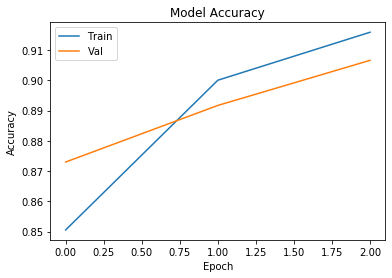

In [14]:
#Visualize the models accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

##Matrice di confusione

Genero la matrice di confusione.

In [15]:
#Necessito di un array con tutte le labels, ho già class_names

test_predictions = cnn_model.predict_classes(test_images)

conf_matr = confusion_matrix(y_true = test_labels, y_pred = test_predictions)
print(conf_matr)

con_mat_norm = np.around(conf_matr.astype('float') / conf_matr.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = class_names, 
                          columns = class_names)

[[840   1  18  43   4   2  87   0   5   0]
 [  1 974   0  19   3   0   1   0   2   0]
 [ 14   0 843   9  83   0  51   0   0   0]
 [  4   1   5 939  31   0  17   0   2   1]
 [  0   0  46  23 884   0  46   0   1   0]
 [  0   0   0   1   0 957   0  20   0  22]
 [ 97   1  79  38  72   0 705   0   8   0]
 [  0   0   0   0   0   6   0 980   0  14]
 [  2   1   4   2   2   3   1   4 981   0]
 [  0   0   0   0   0   3   1  33   0 963]]


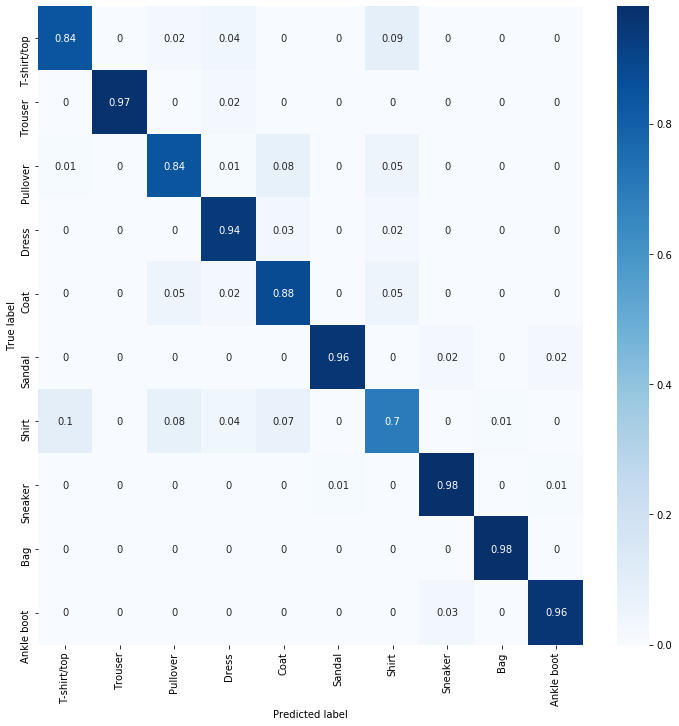

In [16]:
figure = plt.figure(figsize=(10, 10))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#Predizioni

In [17]:
#Show predictions as probabilites for the first 4 images in the test set
predictions = cnn_model.predict(test_images[:4])
predictions

array([[1.7055739e-09, 1.0199615e-08, 1.3561248e-08, 7.3036910e-11,
        1.1716348e-09, 7.4766300e-05, 2.4502234e-10, 1.2998565e-04,
        1.2994789e-09, 9.9979526e-01],
       [4.0526986e-05, 7.2840882e-13, 9.9817073e-01, 1.2563106e-07,
        1.6887059e-03, 2.0626854e-11, 9.9860765e-05, 6.4767795e-11,
        5.3064735e-09, 5.5779895e-11],
       [4.5112831e-08, 9.9999774e-01, 1.4479274e-09, 1.3479596e-06,
        5.6524920e-07, 6.5705508e-09, 1.2135524e-07, 3.0610760e-11,
        2.3957062e-07, 1.7982462e-09],
       [1.1912754e-07, 9.9998116e-01, 5.8774190e-09, 8.2792985e-06,
        7.4563613e-06, 1.5632474e-09, 2.8183160e-06, 2.7996333e-10,
        4.8169898e-08, 3.1548144e-08]], dtype=float32)

In [18]:
#Print our predictions as number labels for the first 4 images
print( np.argmax(predictions, axis=1))
#Print the actual labels
print(test_labels[:4])

[9 2 1 1]
[9 2 1 1]


Ricorda che

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

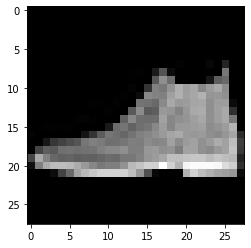

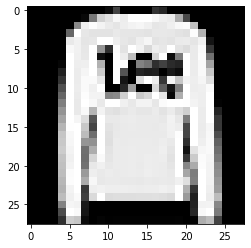

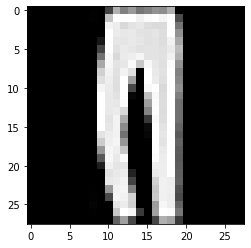

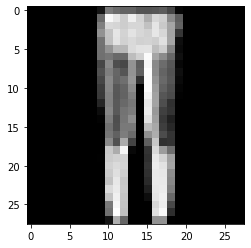

In [19]:
#Show the first 4 images as pictures
for i in range(0,4):
  image = test_images[i]
  image = np.array(image, dtype='float')
  pixels = image.reshape((28,28))
  plt.imshow(pixels, cmap='gray')
  plt.show()